In [0]:
import pandas as pd
df1 = pd.read_csv('/Volumes/workspace/default/airlines/Flight_delay_cleaned.csv')
display(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484310 entries, 0 to 484309
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         484310 non-null  int64 
 1   DayOfWeek          484310 non-null  int64 
 2   Date               484310 non-null  object
 3   DepTime            484310 non-null  object
 4   ArrTime            484310 non-null  object
 5   CRSArrTime         484310 non-null  object
 6   UniqueCarrier      484310 non-null  object
 7   Airline            484310 non-null  object
 8   FlightNum          484310 non-null  int64 
 9   TailNum            484310 non-null  object
 10  ActualElapsedTime  484310 non-null  int64 
 11  CRSElapsedTime     484310 non-null  int64 
 12  AirTime            484310 non-null  int64 
 13  ArrDelay           484310 non-null  int64 
 14  DepDelay           484310 non-null  int64 
 15  Origin             484310 non-null  object
 16  Org_Airport        4

In [0]:
df1.shape


(484310, 35)

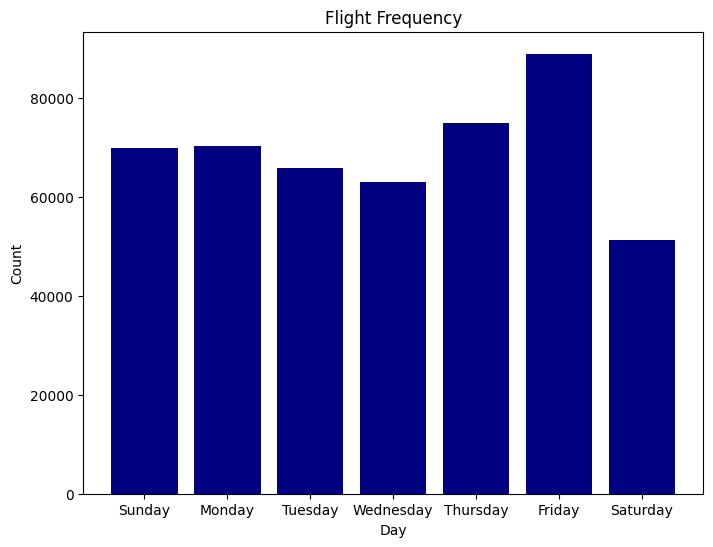

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
day_order = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
quality_counts = df1['DayName'].value_counts().reindex(day_order)
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts, color='navy')
plt.title('Flight Frequency')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

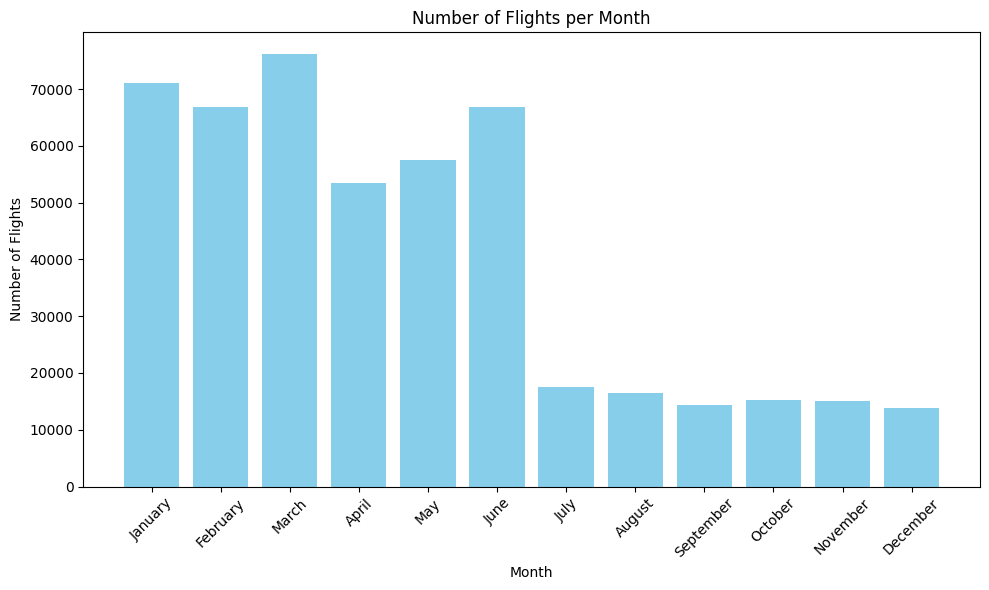

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert numeric month column to full month name
df1['MonthName'] = pd.to_datetime(df1['month'], format='%m').dt.strftime('%B')

# Count flights by month name
flight_counts = df1['MonthName'].value_counts().reindex(month_order, fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(flight_counts.index, flight_counts.values, color='skyblue')
plt.title('Number of Flights per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


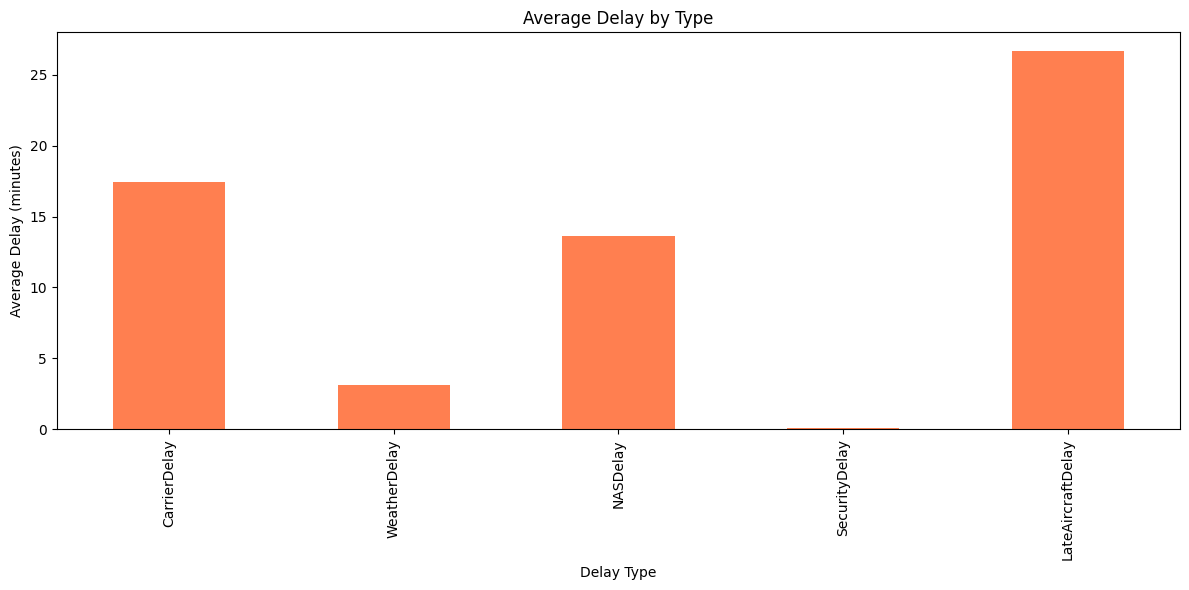

In [0]:
import matplotlib.pyplot as plt

delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
plt.figure(figsize=(12, 6))
df1[delay_types].mean().plot(kind='bar', color='coral')
plt.title('Average Delay by Type')
plt.xlabel('Delay Type')
plt.ylabel('Average Delay (minutes)')
plt.tight_layout()
plt.show()

In [0]:
top10_security_delay = df1.groupby('Origin')['SecurityDelay'].mean().sort_values(ascending=False).head(10)
display(top10_security_delay)

Origin
BRW    6.126984
YUM    3.303571
SCC    2.425532
OME    1.888889
EKO    1.757143
OTZ    1.529412
IPL    1.342857
BET    1.181818
ASE    1.048673
RDD    0.935000
Name: SecurityDelay, dtype: float64

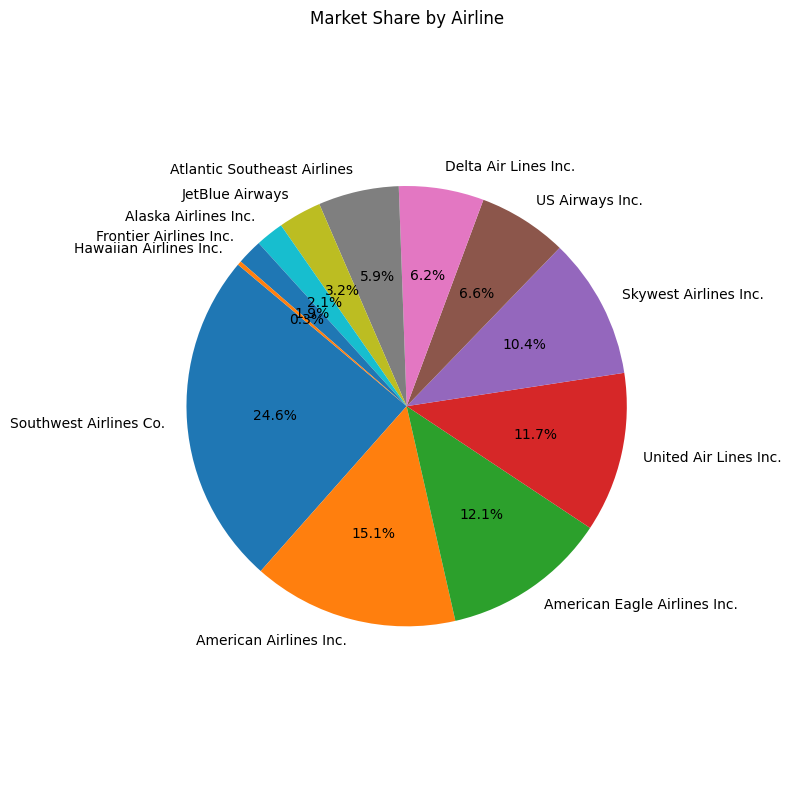

In [0]:
import matplotlib.pyplot as plt

# Calculate market share by airline (assuming 'UniqueCarrier' column exists)
market_share = df1['Airline'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Share by Airline')
plt.axis('equal')
plt.tight_layout()
plt.show()

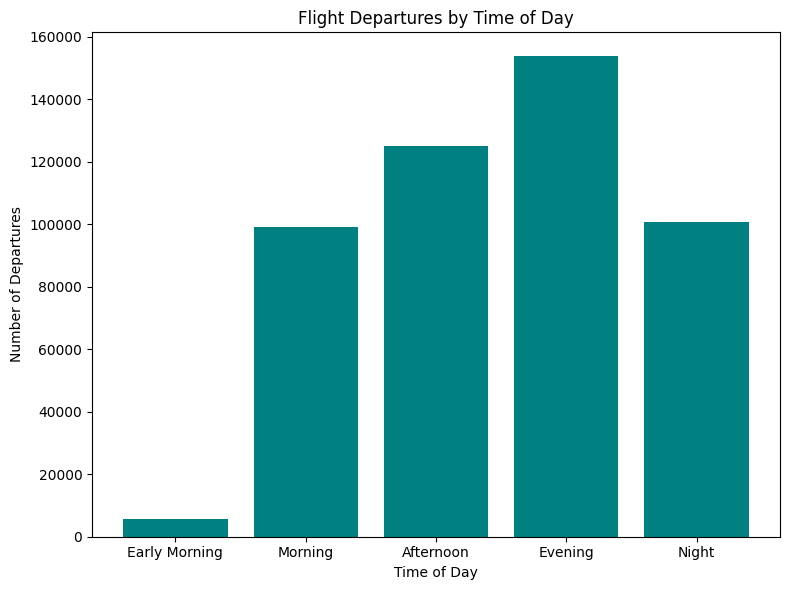

In [0]:
import matplotlib.pyplot as plt

# Define bins and labels
bins = [0, 5, 11, 15, 19, 23]
labels = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']

# Ensure 'DepTime' is in HHMM or HH:MM format, extract hour
if df1['DepTime'].dtype == object:
    df1['DepHour'] = pd.to_datetime(df1['DepTime'], errors='coerce').dt.hour
else:
    df1['DepHour'] = (df1['DepTime'] // 100).astype('Int64')

# Assign time of day
df1['TimeOfDay'] = pd.cut(df1['DepHour'], bins=[-1,5,11,15,19,23], labels=labels, right=True)

# Count flights by time of day
time_counts = df1['TimeOfDay'].value_counts().reindex(labels, fill_value=0)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(time_counts.index, time_counts.values, color='teal')
plt.title('Flight Departures by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Departures')
plt.tight_layout()
plt.show()

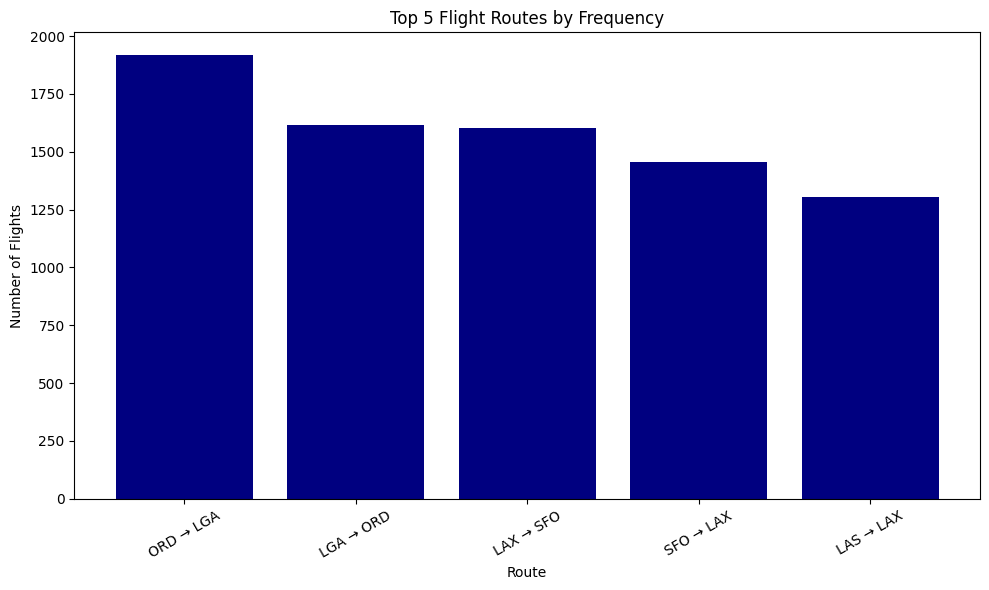

In [0]:
import matplotlib.pyplot as plt

# Create a route column combining Origin and Dest
df1['Route'] = df1['Origin'] + ' → ' + df1['Dest']

# Get top 5 routes by frequency
top_routes = df1['Route'].value_counts().head(5)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_routes.index, top_routes.values, color='navy')
plt.title('Top 5 Flight Routes by Frequency')
plt.xlabel('Route')
plt.ylabel('Number of Flights')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

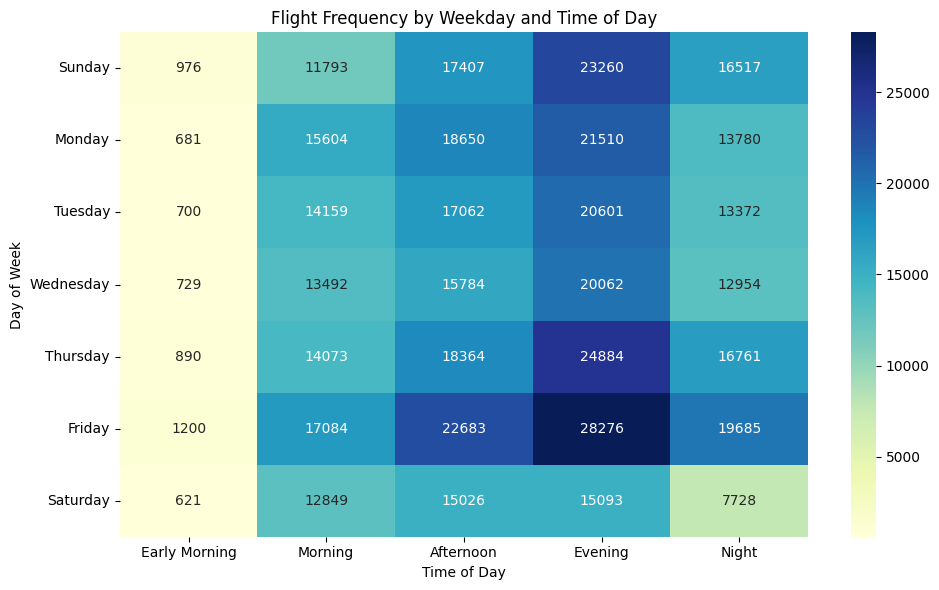

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'TimeOfDay' and 'DayName' columns exist and are ordered
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
time_labels = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']

# Create a pivot table for heatmap
heatmap_data = df1.pivot_table(index='DayName', columns='TimeOfDay', values='Route', aggfunc='count', fill_value=0)
heatmap_data = heatmap_data.reindex(index=day_order, columns=time_labels)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Flight Frequency by Weekday and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

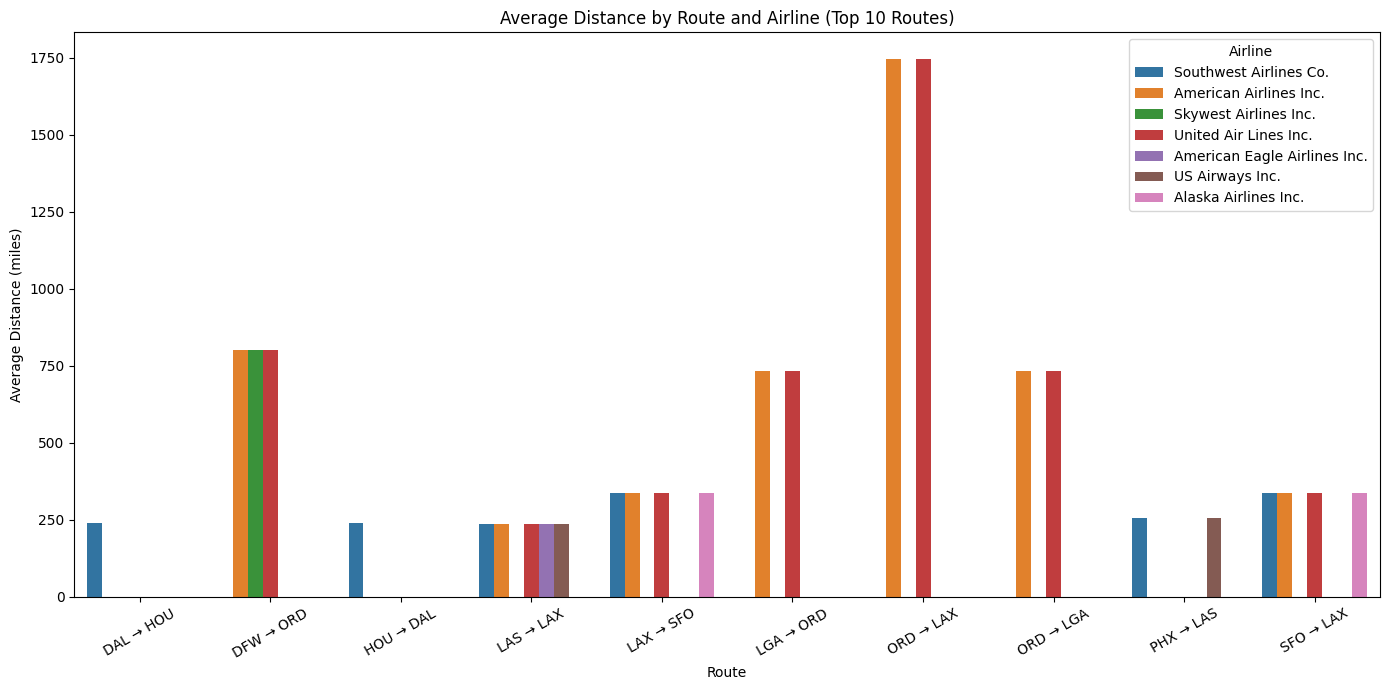

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Route', 'Distance', and 'Airline' columns exist
# Group by Route and Airline, calculate average distance
route_airline_distance = df1.groupby(['Route', 'Airline'])['Distance'].mean().reset_index()

# Get top 10 routes by frequency for clarity in visualization
top_routes = df1['Route'].value_counts().head(10).index
filtered_data = route_airline_distance[route_airline_distance['Route'].isin(top_routes)]

plt.figure(figsize=(14, 7))
sns.barplot(data=filtered_data, x='Route', y='Distance', hue='Airline')
plt.title('Average Distance by Route and Airline (Top 10 Routes)')
plt.xlabel('Route')
plt.ylabel('Average Distance (miles)')
plt.xticks(rotation=30)
plt.legend(title='Airline')
plt.tight_layout()
plt.show()